# 149_A___VALEO Sensorwischer
Anfrage vom 29.11.2018 über David Vuong. Siehe Projekt Orgamax.

Valeo möchte ein Wischsystem für Sensoren entwickeln, die in autonomen Fahrzeugen zum Einsatz kommen. 
* Das System soll aus einem Outer Rotor BLDC inklusive Ansteuerung bestehen,
* nach Möglichkeit soll KOAM eine komplette Baugruppe liefern,
* erste Serienteile werden Ende 2020 benötigt,
* Valeo geht von einer Gesamtstückzahl von 210000 Baugruppen aus, verteilt über zwei Jahre.

Derzeit offen:
* Steuersignale (vermutlich gibt es eine Versorgungsspannung und sein Sensorsignal)

## Option 1: Übertragung mit Zahnriehmen
Kommentar: noch unklar wie die Einheit "cpm" zu verstehen ist. Typischerweise steht es für "cycles per minute", allerdings ist in der Angabe von Herrn Heuberger vermutlich schon die halbe Motorgeschwindigkeit gemeint, da er die cpm-Angaben schon mit der Zahnriemenübersetzung skaliert hat.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MotorCalc import *

In [2]:
########################
# Customer requirements 
########################

# Customer voltage [V]
U_C = 12
# Working point speed [rpm] (120 cpm)
n_WP = 120
# Working point torque [Nm]
M_WP = 0.017
# max Torque [Nm]
M_max = 0.17
# min speed [rpm] (45cpm)
n_min = 45
# angular accuracy [°]
d_alpha = 0.3
# start current [A]
I_start = 10 
#max. motor height [mm]
height_max = 18
#max. motor diameter [mm]
D_max = 50

# desired max mech. power
P_mech_des_max = M_max * n_min * np.pi/30.0
# mech. power at working point
P_mech_WP = M_WP * n_WP * np.pi/30.0

print('desired max. mech. Power {:0.2f}W'.format(P_mech_des_max))
print('desired mech. Power at WP {:0.2f}W'.format(P_mech_WP))


desired max. mech. Power 0.80W
desired mech. Power at WP 0.21W


### BO3518NB2B @ WP

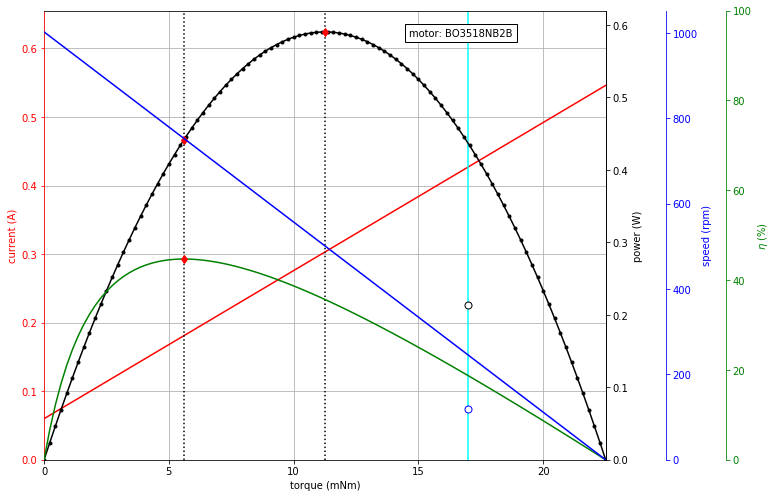

In [26]:
U_N = 12.0
PWM_DC=0.455
R = 10.0
n_0 = 2350
I_0 = 0.06
k_M = 0.0463

m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name='BO3518NB2B')

m.plotCurves()

### BO3518NB2B @ max Torque

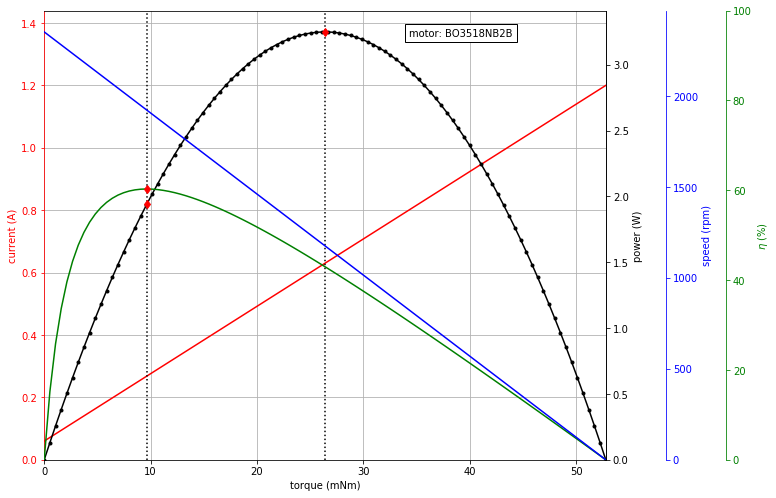

In [27]:
U_N = 12.0
PWM_DC=1.0
R = 10.0
n_0 = 2350
I_0 = 0.06
k_M = 0.0463

m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_max, n_WP = n_min, motor_name='BO3518NB2B')

m.plotCurves()

! Desired max torque cannot be reached !

## BO4316 CC: 3706 -> Email Belinda Jan 14, 2019 @ Working Point

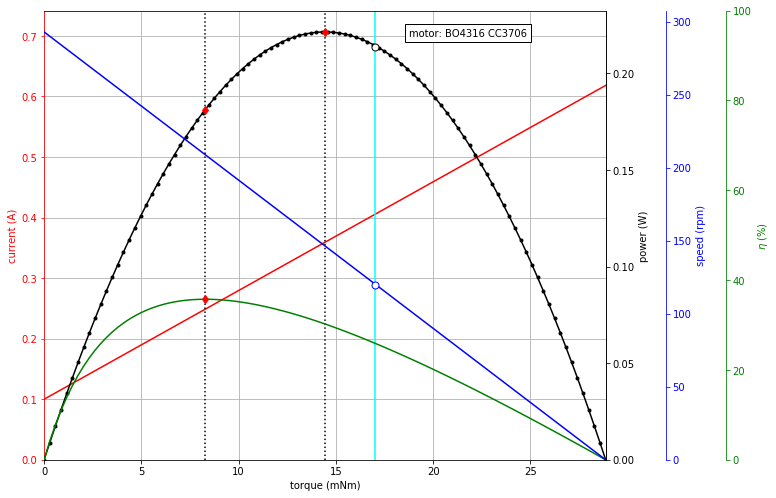

In [28]:
U_N = 12.0
PWM_DC=.17
R = 3.3
n_0 = 2000
I_0 = 0.1
k_M = 0.05572
 
m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name='BO4316 CC3706')

m.plotCurves()

In [29]:
P_el_WP = m.calc_P_el_from_M(M_WP)
print('mech. power at WP {:0.2f}W'.format(P_mech_WP))
print('el. power at WP {:0.2f}W'.format(P_el_WP))
print('loss power at WP {:0.2f}W'.format(P_el_WP-P_mech_WP))

mech. power at WP 0.21W
el. power at WP 0.83W
loss power at WP 0.61W


## BO4316 CC: 3706 -> Email Belinda Jan 14, 2019 @ Max. Torque

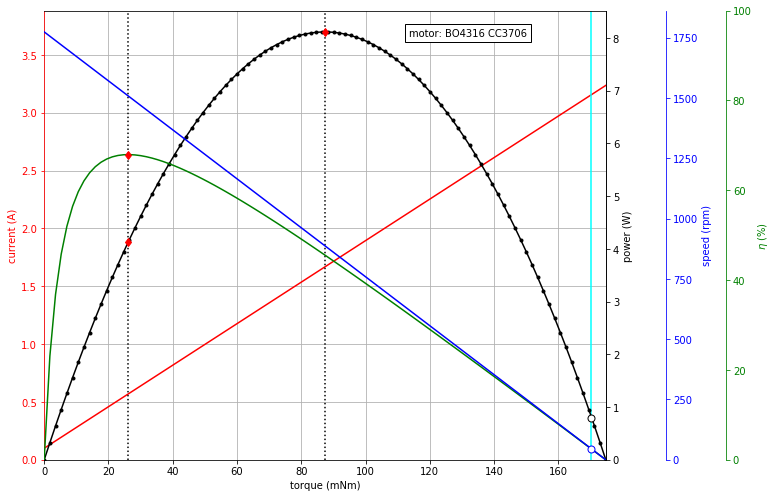

In [30]:
U_N = 12.0
PWM_DC=.89
R = 3.3
n_0 = 2000
I_0 = 0.1
k_M = 0.05572
 
m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_max, n_WP = n_min, motor_name='BO4316 CC3706')

m.plotCurves()

In [31]:
P_el_WP = m.calc_P_el_from_M(M_max)
print('mech. power at max. torque {:0.2f}W'.format(P_mech_des_max))
print('el. power at max. torque {:0.2f}W'.format(P_el_WP))
print('loss power at max. torque {:0.2f}W'.format(P_el_WP-P_mech_des_max))

mech. power at max. torque 0.80W
el. power at max. torque 33.65W
loss power at max. torque 32.85W


## BO4316 CC: 3706 -> Email Belinda Jan 14, 2019 @ 100% Duty Cycle

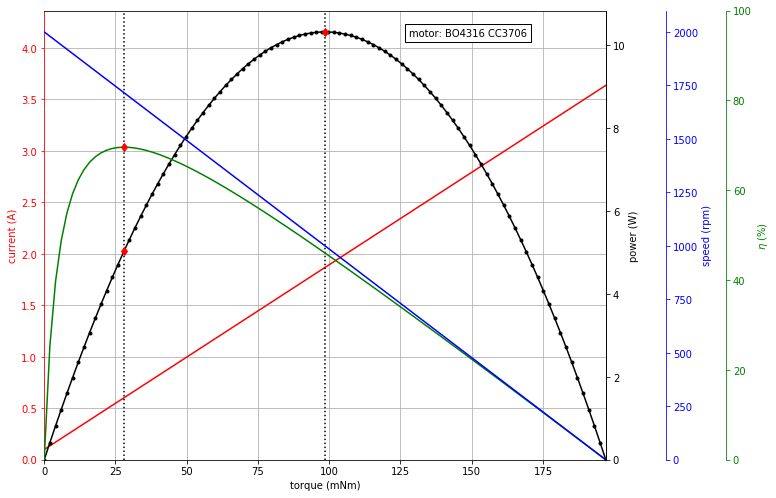

In [9]:
U_N = 12.0
PWM_DC=1
R = 3.3
n_0 = 2000
I_0 = 0.1
k_M = 0.05572
 
m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_max, n_WP = n_min, motor_name='BO4316 CC3706')

m.plotCurves()

### Tabelle mit Motor-Parametern

| Name | Unit | Value | Comment
|:---|:---:|:---:|:---
|**Input parameter**
|$U_{\rm{N}}$| V | {{m.U_N}} | rated Voltage
|$I_0$|A|{{m.I_0}}| no load current
|$k_{\rm{M}}$|mNm/A|{{"{:0.2f}".format(m.k_M*1000)}}| torque constant
|$R$|$\Omega$|{{"{:0.2f}".format(m.R)}}|terminal resistance
|**Output parameter**
|$I_{\rm{S}}$|A|{{"{:0.2f}".format(m.I_S)}}| stall current
|$I_{\rm{meff}}$|A|{{"{:0.2f}".format(m.I_meff)}}|current @ $\eta_{\rm{max}}$
|$n_0$|min$^{-1}$|{{"{:0.0f}".format(m.n_0)}}| no load speed
|$n_{\rm{meff}}$|min$^{-1}$|{{"{:0.0f}".format(m.n_meff)}}| speed @ $\eta_{\rm{max}}$
|$M_{\rm{S}}$|mNm|{{"{:0.2f}".format(m.M_S*1000)}}| stall torque
|$M_{\rm{0}}$|mNm|{{"{:0.2f}".format(m.M_0*1000)}}| loss torque
|$M_{\rm{meff}}$|mNm|{{"{:0.2f}".format(m.M_meff*1000)}}| torque @ $\eta_{\rm{max}}$
|$M_{\rm{max power}}$|mNm|{{"{:0.2f}".format(m.M_maxpower*1000)}}| torque @ $P_{\rm{max}}$
|$P_{\rm{meff}}$|W|{{"{:0.2f}".format(m.P_meff)}}| power @ $\eta_{\rm{max}}$
|$P_{\rm{max}}$|W|{{"{:0.2f}".format(m.P_maxpower)}}| max. power
|$\eta_{\rm{max}}$| % | {{"{:0.2f}".format(m.eta_max*100.0)}} | max. efficiency

## BO4316 CC: 3706 -> für erhöhte Anforderung (170mNm @ 90 RPM)
s. Email Herr Heuberger 22.01.2019

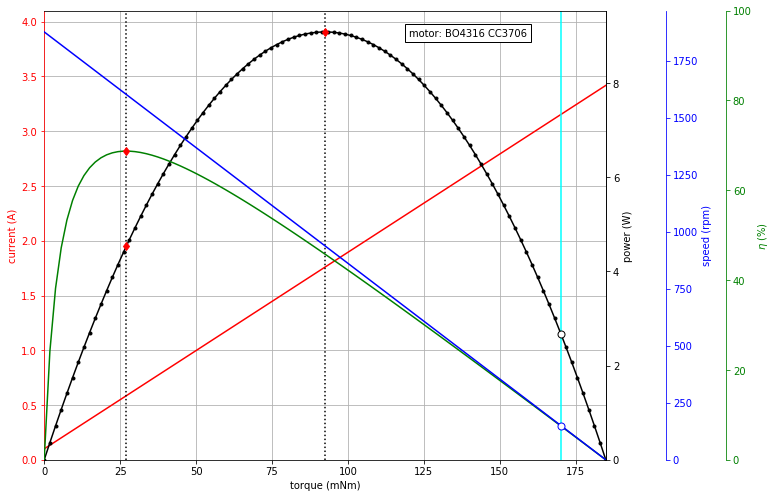

In [8]:
U_N = 12.0
PWM_DC=0.94
R = 3.3
n_0 = 2000
I_0 = 0.1
k_M = 0.05572


# Working point speed [rpm] (120 cpm)
n_WP = 150
# Working point torque [Nm]
M_WP = 0.17
# max Torque [Nm]
M_max = 0.5
# min speed [rpm] (45cpm)
n_min = 90

 
m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name='BO4316 CC3706')

m.plotCurves()

### BO4316NB2B @ WP

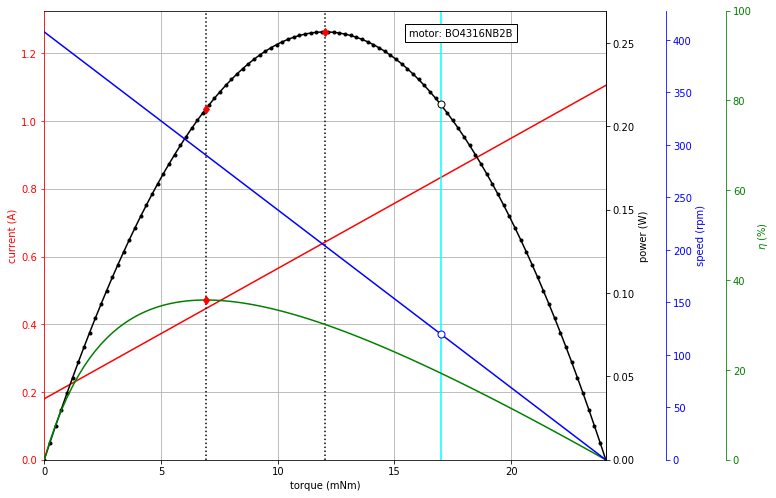

In [10]:
U_N = 12.0
PWM_DC=0.1105
R = 1.2
n_0 = 4350
I_0 = 0.18
k_M = 0.026
 
m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name='BO4316NB2B')

m.plotCurves()

In [11]:
P_el_WP = m.calc_P_el_from_M(M_WP)
print('mech. power at WP {:0.2f}W'.format(P_mech_WP))
print('el. power at WP {:0.2f}W'.format(P_el_WP))
print('loss power at WP {:0.2f}W'.format(P_el_WP-P_mech_WP))

mech. power at WP 0.21W
el. power at WP 1.11W
loss power at WP 0.89W


### BO4316NB2B @ max. Torque

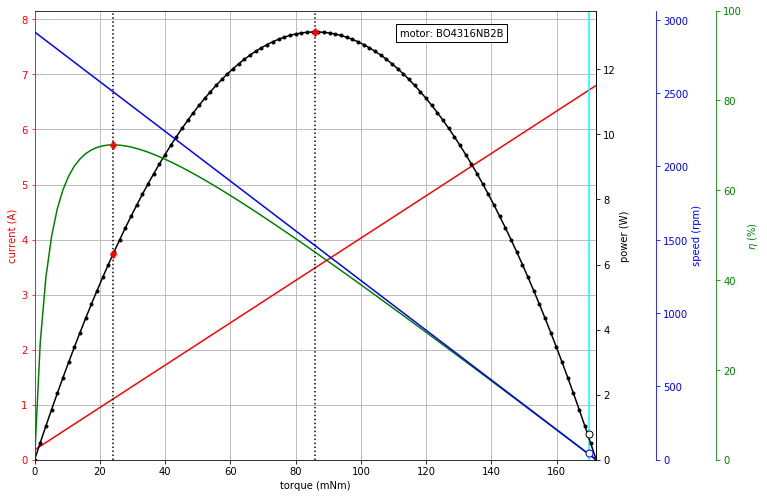

In [12]:
U_N = 12.0
PWM_DC=0.68
R = 1.2
n_0 = 4350
I_0 = 0.18
k_M = 0.026

m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_max, n_WP = n_min, motor_name='BO4316NB2B')

m.plotCurves()

In [13]:
P_el_WP = m.calc_P_el_from_M(M_max)
print('mech. power at WP {:0.2f}W'.format(P_mech_des_max))
print('el. power at WP {:0.2f}W'.format(P_el_WP))
print('loss power at WP {:0.2f}W'.format(P_el_WP-P_mech_des_max))

mech. power at WP 0.80W
el. power at WP 54.82W
loss power at WP 54.02W


### BO4316NB2B bei 100% Duty Cycle

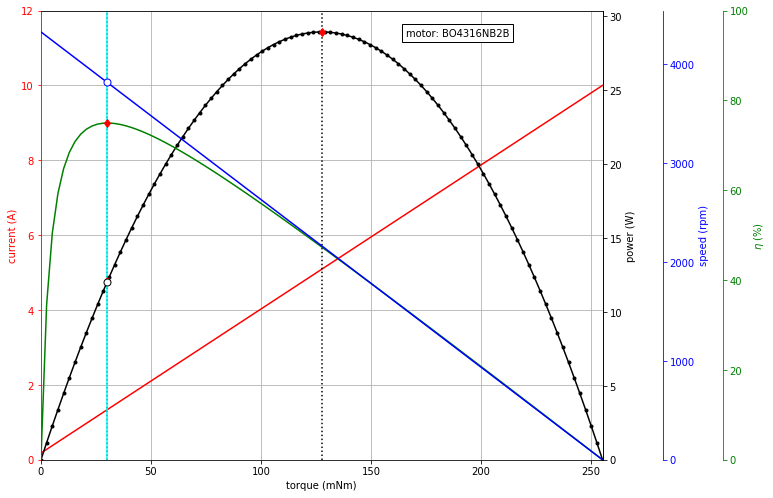

In [14]:
U_N = 12.0
PWM_DC=1.0
R = 1.2
n_0 = 4350
I_0 = 0.18
k_M = 0.026

m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = 0.030, n_WP = 3820, motor_name='BO4316NB2B')

m.plotCurves()

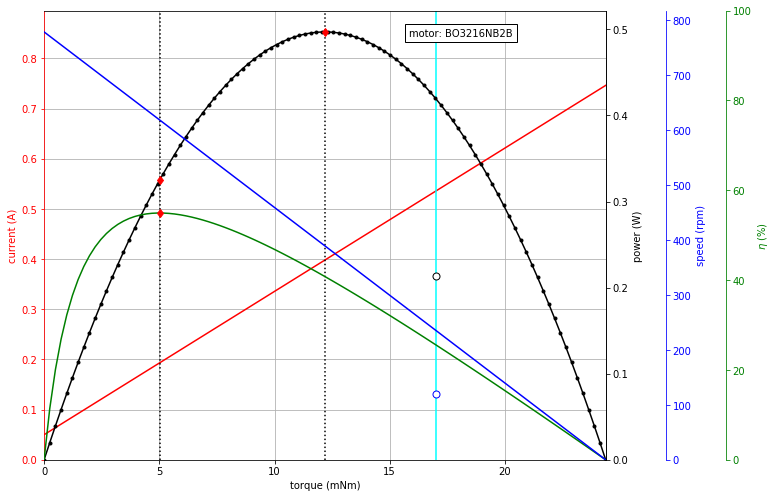

In [15]:
### BO3216NB2B @ WP

U_N = 12.0
PWM_DC=0.255
R = 4.1
n_0 = 3200
I_0 = 0.05
k_M = 0.035

m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name='BO3216NB2B')

m.plotCurves()

### BO3216NB2B @ max Torque

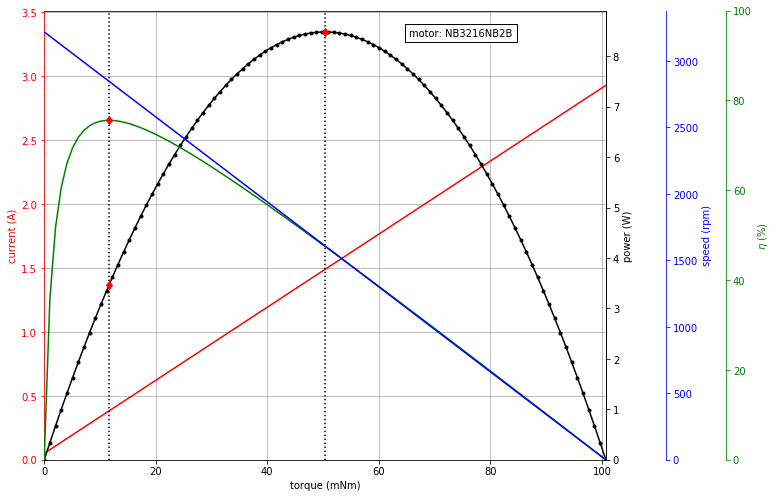

In [16]:
U_N = 12.0
PWM_DC=1.0
R = 4.1
n_0 = 3200
I_0 = 0.05
k_M = 0.035

m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_max, n_WP = n_min, motor_name='NB3216NB2B')

m.plotCurves()

! Max torque cannot be reached !

## Option 2 - Direct coupling

In [17]:
########################
# Customer requirements 
########################

# Customer voltage [V]
U_C = 12
# Working point speed [rpm] (40 cpm)
n_WP = 40
# Working point torque [Nm]
M_WP = 0.05
# max Torque [Nm]
M_max = 0.5
# min speed [rpm] (15cpm)
n_min = 15
# angular accuracy [°]
d_alpha = 0.1
# start current [A]
I_start = 10 
#max. motor height [mm]
height_max = 25
#max. motor diameter [mm]
D_max = 50

# desired max mech. power
P_mech_des_max = M_max * n_min * np.pi/30.0
# mech. power at working point
P_mech_WP = M_WP * n_WP * np.pi/30.0

print('desired max. mech. Power {:0.2f}W'.format(P_mech_des_max))
print('desired mech. Power at WP {:0.2f}W'.format(P_mech_WP))


desired max. mech. Power 0.79W
desired mech. Power at WP 0.21W


### BO4324NB2B-XX-12.0 (only theoretical)

### @ WP

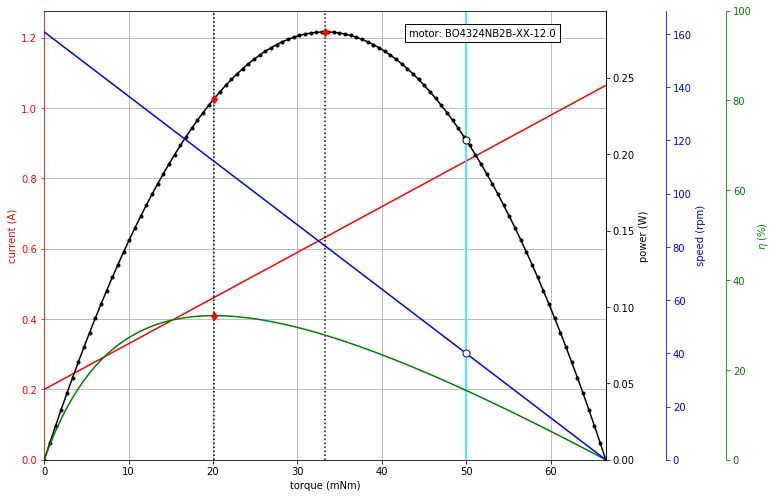

In [18]:
U_N = 12.0
PWM_DC=0.133
R = 1.5
I_0 = 0.2
k_M = 0.077

m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name='BO4324NB2B-XX-12.0')

m.plotCurves()

In [19]:
P_el_WP = m.calc_P_el_from_M(M_WP)
print('mech. power at WP {:0.2f}W'.format(P_mech_WP))
print('el. power at WP {:0.2f}W'.format(P_el_WP))
print('loss power at WP {:0.2f}W'.format(P_el_WP-P_mech_WP))
n=m.calc_n_from_M(0)
print('no load speed = {:0.1f} RPM'.format(n))

mech. power at WP 0.21W
el. power at WP 1.36W
loss power at WP 1.15W
no load speed = 160.7 RPM


### @ max. torque

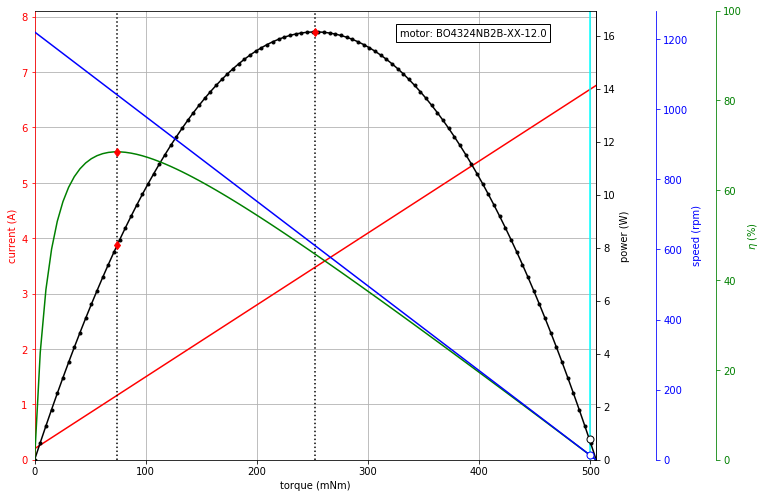

In [20]:
U_N = 12.0
PWM_DC=0.845
R = 1.5
I_0 = 0.2
k_M = 0.077

m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_max, n_WP = n_min, motor_name='BO4324NB2B-XX-12.0')

m.plotCurves()

In [21]:
P_el_WP = m.calc_P_el_from_M(M_max)
print('mech. power at WP {:0.2f}W'.format(P_mech_des_max))
print('el. power at WP {:0.2f}W'.format(P_el_WP))
print('loss power at WP {:0.2f}W'.format(P_el_WP-P_mech_des_max))

mech. power at WP 0.79W
el. power at WP 67.87W
loss power at WP 67.09W


### @ 100% Duty Cycle

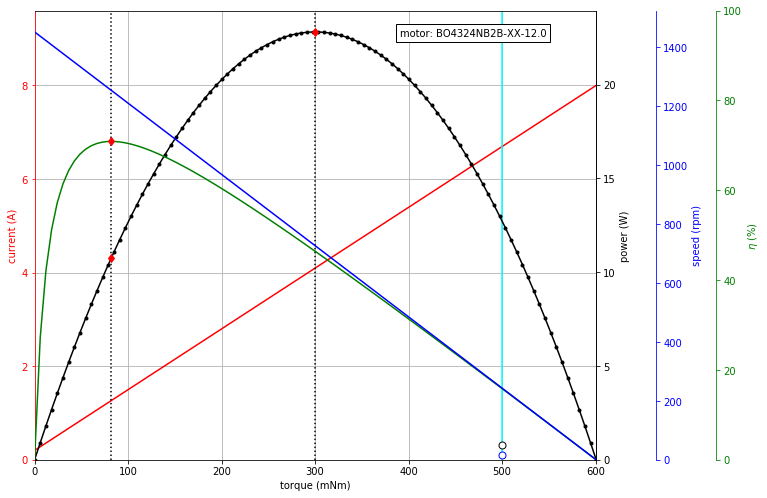

In [22]:
U_N = 12.0
PWM_DC=1.0
R = 1.5
I_0 = 0.2
k_M = 0.077

m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_max, n_WP = n_min, motor_name='BO4324NB2B-XX-12.0')

m.plotCurves()

### Tabelle mit Motor-Parametern

| Name | Unit | Value | Comment
|:---|:---:|:---:|:---
|**Input parameter**
|$U_{\rm{N}}$| V | {{m.U_N}} | rated Voltage
|$I_0$|A|{{m.I_0}}| no load current
|$k_{\rm{M}}$|mNm/A|{{"{:0.2f}".format(m.k_M*1000)}}| torque constant
|$R$|$\Omega$|{{"{:0.2f}".format(m.R)}}|terminal resistance
|**Output parameter**
|$I_{\rm{S}}$|A|{{"{:0.2f}".format(m.I_S)}}| stall current
|$I_{\rm{meff}}$|A|{{"{:0.2f}".format(m.I_meff)}}|current @ $\eta_{\rm{max}}$
|$n_0$|min$^{-1}$|{{"{:0.0f}".format(m.n_0)}}| no load speed
|$n_{\rm{meff}}$|min$^{-1}$|{{"{:0.0f}".format(m.n_meff)}}| speed @ $\eta_{\rm{max}}$
|$M_{\rm{S}}$|mNm|{{"{:0.2f}".format(m.M_S*1000)}}| stall torque
|$M_{\rm{0}}$|mNm|{{"{:0.2f}".format(m.M_0*1000)}}| loss torque
|$M_{\rm{meff}}$|mNm|{{"{:0.2f}".format(m.M_meff*1000)}}| torque @ $\eta_{\rm{max}}$
|$M_{\rm{max power}}$|mNm|{{"{:0.2f}".format(m.M_maxpower*1000)}}| torque @ $P_{\rm{max}}$
|$P_{\rm{meff}}$|W|{{"{:0.2f}".format(m.P_meff)}}| power @ $\eta_{\rm{max}}$
|$P_{\rm{max}}$|W|{{"{:0.2f}".format(m.P_maxpower)}}| max. power
|$\eta_{\rm{max}}$| % | {{"{:0.2f}".format(m.eta_max*100.0)}} | max. efficiency

### Optimalfall

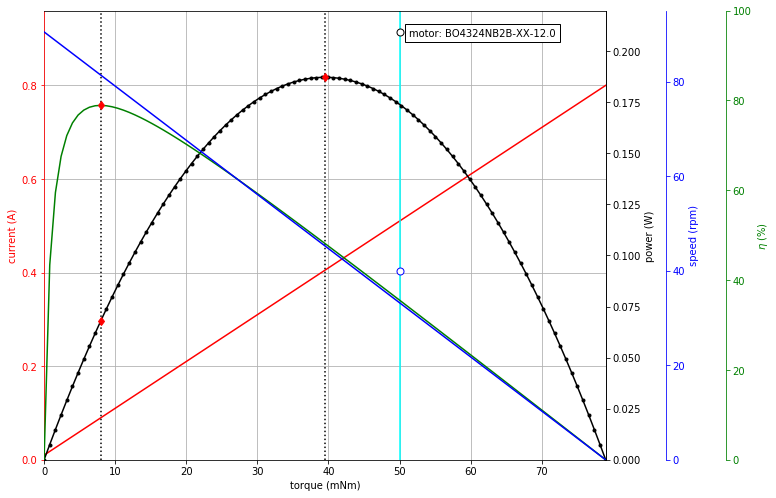

In [23]:
U_N = 12.0
PWM_DC=0.08
R = 1.2
I_0 = 0.01
k_M = 0.1

m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name='BO4324NB2B-XX-12.0')

m.plotCurves()